## VISUALIZAÇÃO TEMPORAL DE VIBRAÇÃO

O objetivo desse notebook é visualizar:
* Anos com dados nulos
* O comportamento da tag ao longo do tempo

Requisitos para rodar esse notebook:
* É necessário rodar '1_preprocessamento'/'0.1_analise_tags_recebidas'

In [1]:
import json
import pandas as pd
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import time

%run ..\..\..\funcoes_base_global\funcoes_plot.py

#### Leitura do Arquivo JSON contendo todas as Tag's e suas descrições

In [2]:
dir_tags = '..\\..\\..\\funcoes_base_global\\tags_description.json' 

with open(dir_tags) as f:
    tags_names = json.loads(f.read())

#### Exemplo de Utilização

In [3]:
comp = '302A'
tipo = 'Vibracao'
tags_names[comp][tipo]

{'XI3403.PV': 'VIB VERTICAL 1o ESTAGIO',
 'XI3404.PV': 'VIB HORIZONTAL 1o ESTAGIO',
 'XI3405.PV': 'VIB VERTICAL 2o ESTAGIO',
 'XI3406.PV': 'VIB HORIZONTAL 2o ESTAGIO'}

In [4]:
def path(name):
    path = os.path.join('..','1_preprocessamento','out',name)
    return(path)

def path_out(name):
    path = os.path.join('out',name)
    return(path)

In [6]:
df = pd.read_csv(path('df_vibracao.csv.gz'), compression = 'gzip', parse_dates = ['Date'], index_col = 'Date')

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4,6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
columns_drop = df.columns[df.columns.str.contains('_quality')]
data = df[list(tags_names[comp][tipo].keys())]

### 1. Anos faltantes

In [8]:
# criando um dataframe novo cujo index são os anos
df_year = data.copy()
df_year.index = df_year.index.year

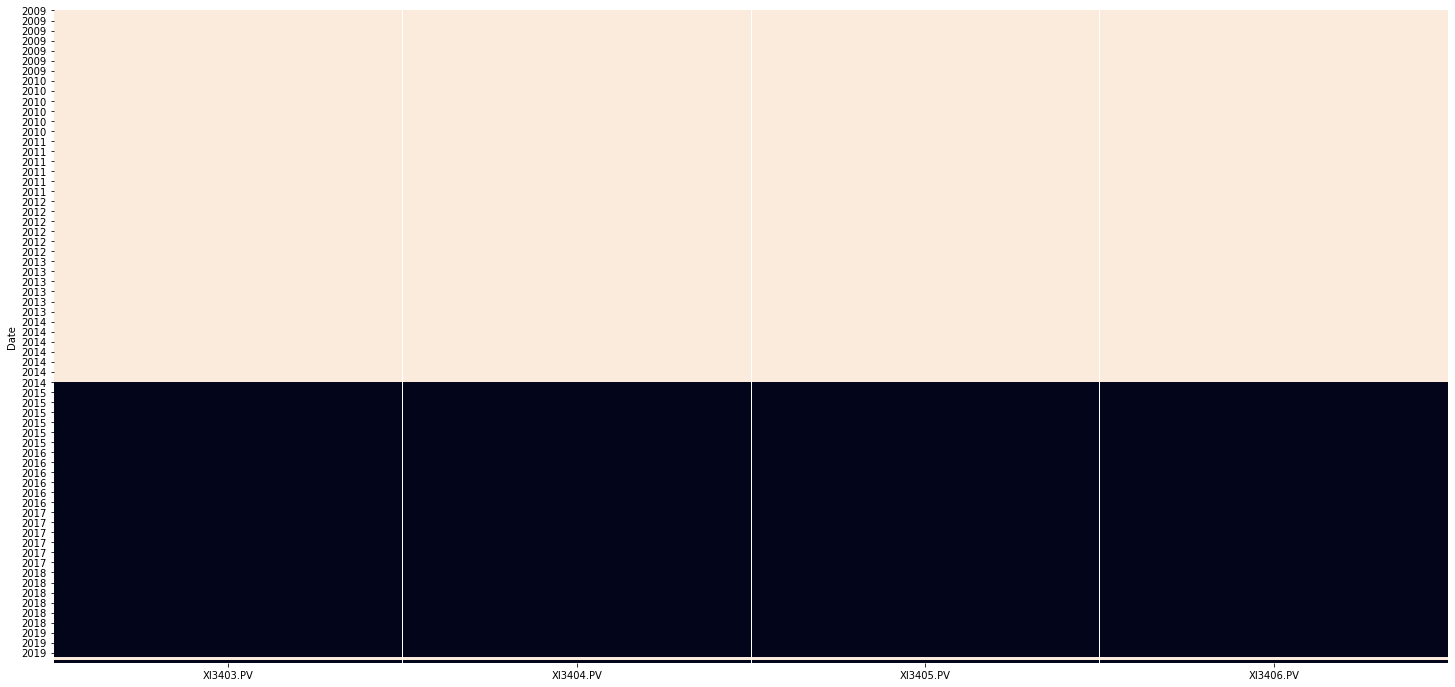

In [9]:
plt.figure(figsize = [25,12])
sns.heatmap(df_year.isnull(), cbar = False)

### 2. A partir de 2015

(2371445, 1)


C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


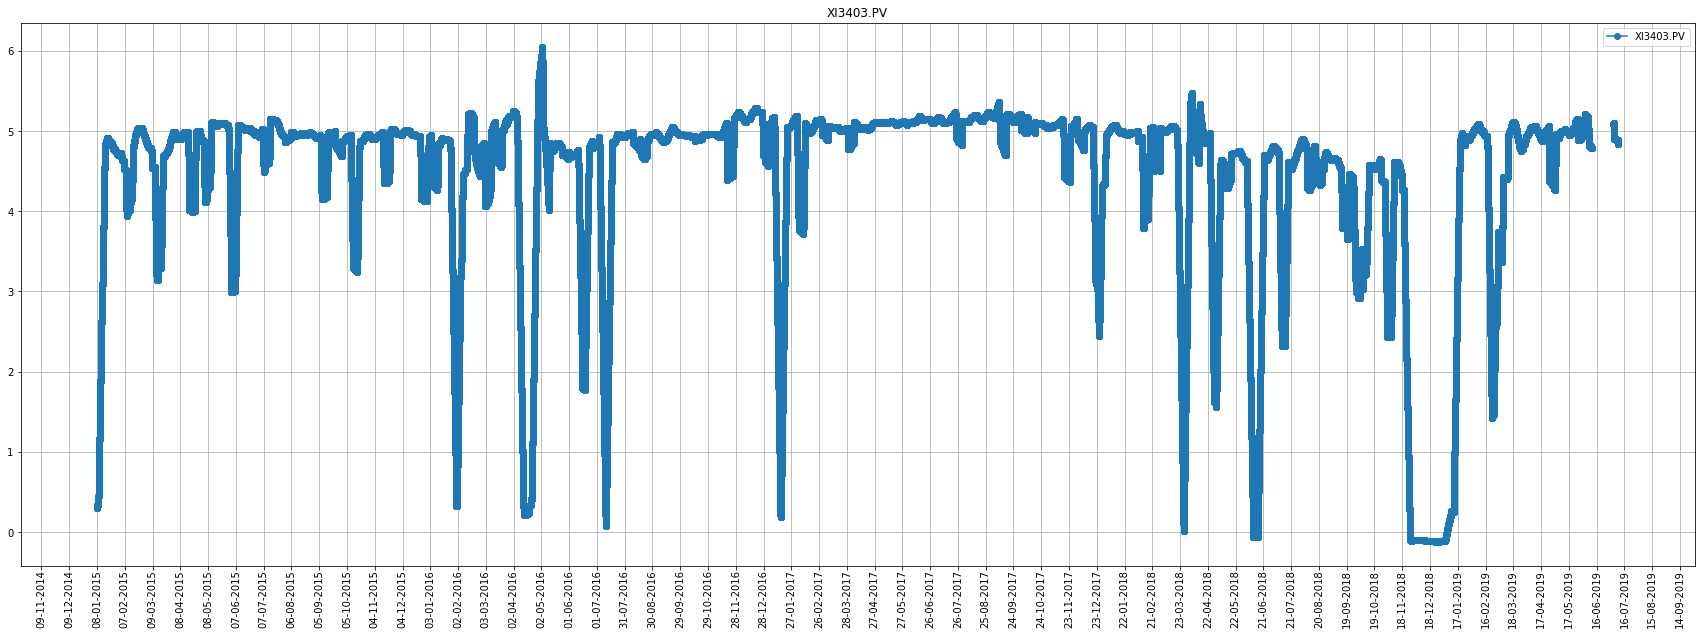

(2371445, 1)


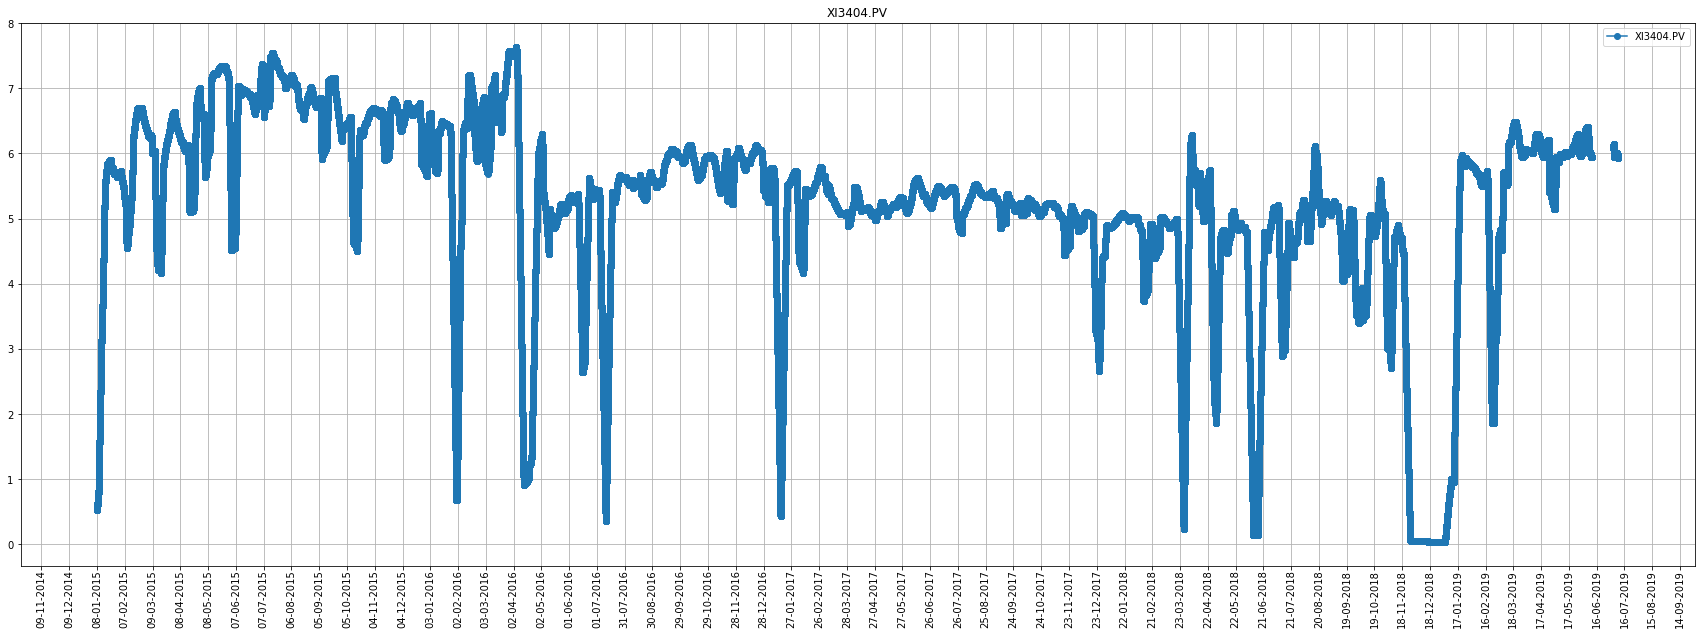

(2371445, 1)


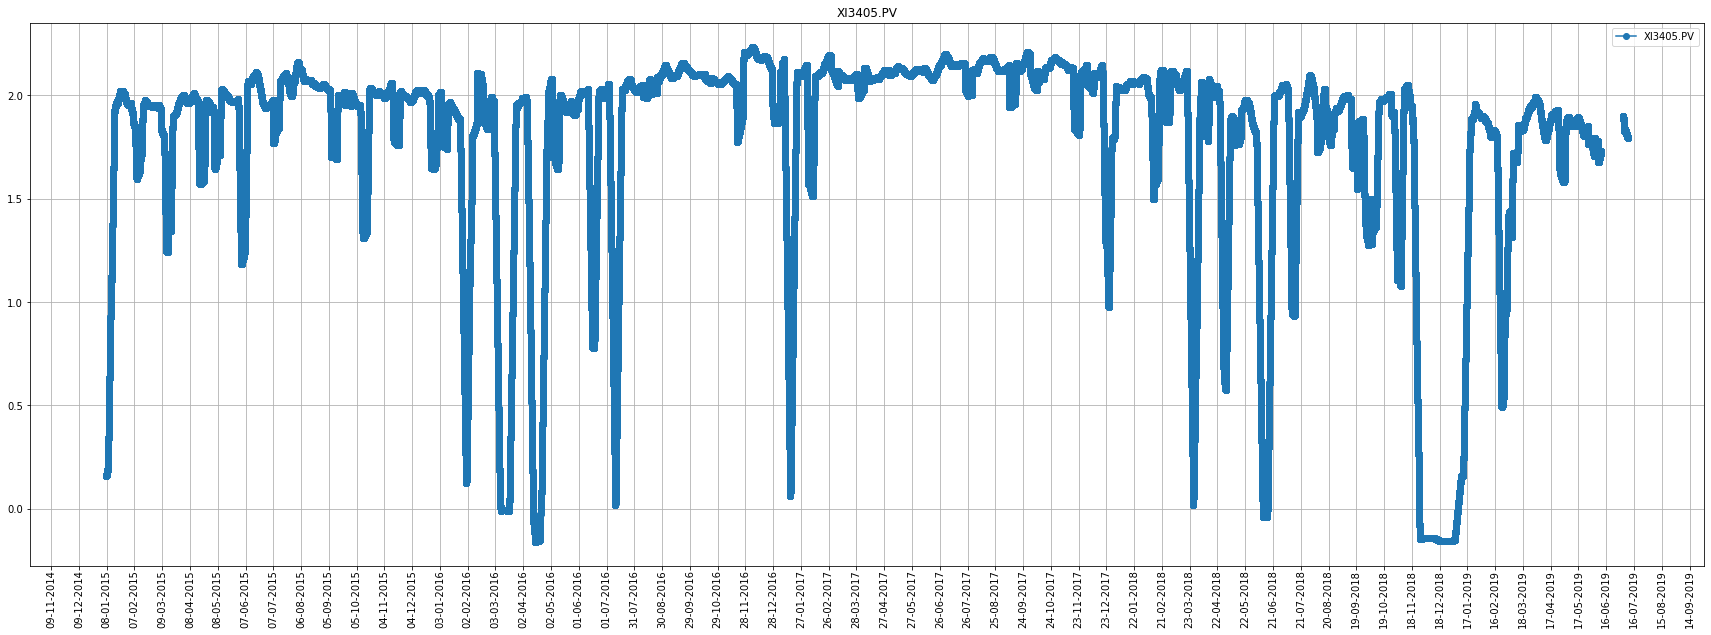

(2371445, 1)


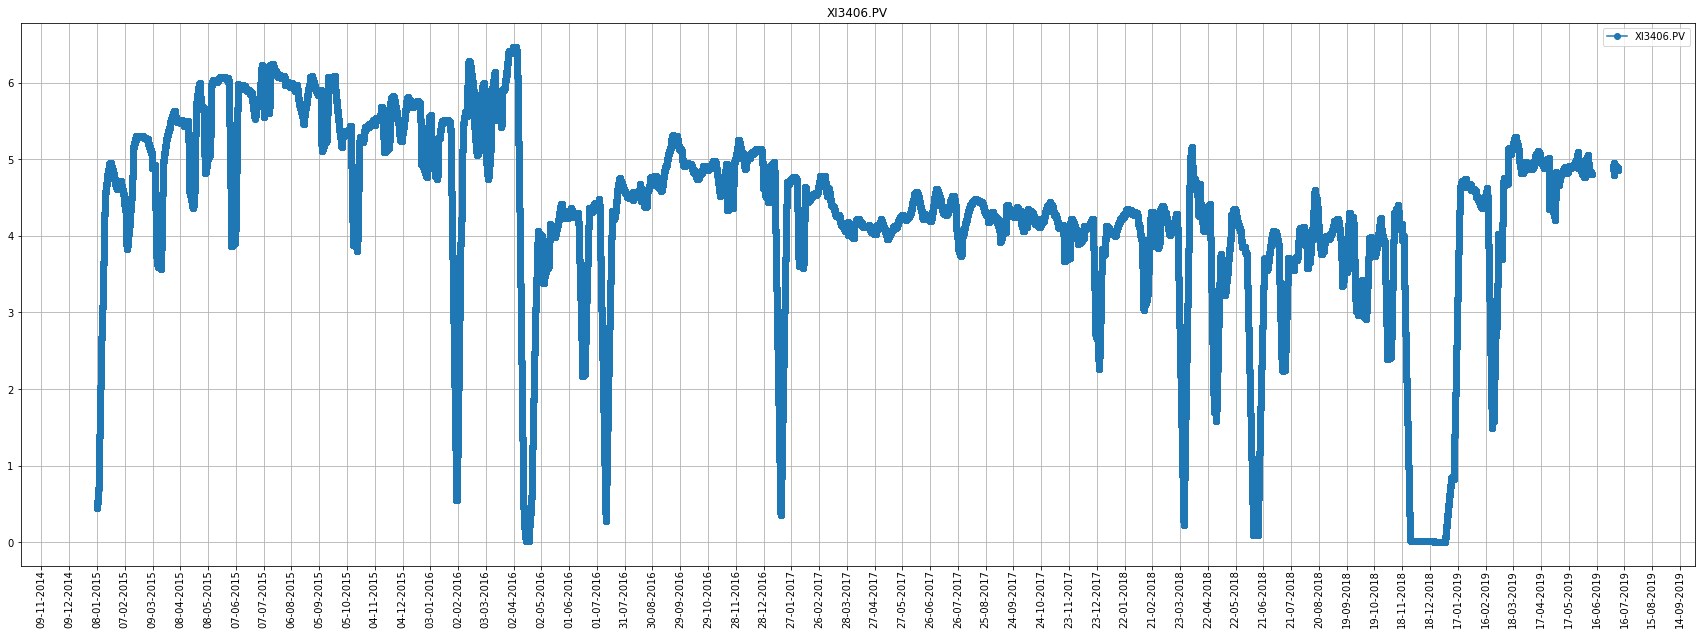

In [10]:
start_date ='2015-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]
for tag in list(tags_names[comp][tipo].keys()):
    plot_variables_rolling_V2(data,[tag],legend=[tag],reference_line=[],
                           rolling_time=roling,
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);

In [11]:
if 'XA3401.PV' in data.columns:
    data.drop('XA3401.PV', axis = 1, inplace = True)
data.sort_index(inplace = True)
data_2015 = data.loc[start_date:]   # pegando os dados a partir de 2015

In [12]:
descricao_tag = tags_names[comp][tipo]
data_2015.rename(columns = descricao_tag, inplace = True)
data_2015.columns

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['VIB VERTICAL 1o ESTAGIO', 'VIB HORIZONTAL 1o ESTAGIO',
       'VIB VERTICAL 2o ESTAGIO', 'VIB HORIZONTAL 2o ESTAGIO'],
      dtype='object')

In [13]:
data_2015.describe()

,VIB VERTICAL 1o ESTAGIO,VIB HORIZONTAL 1o ESTAGIO,VIB VERTICAL 2o ESTAGIO,VIB HORIZONTAL 2o ESTAGIO
count,2.348044e+06,2.348044e+06,2.348044e+06,2.348044e+06
mean,4.413410e+00,5.201737e+00,1.775360e+00,4.293753e+00
std,1.599992e+00,1.878491e+00,6.951907e-01,1.598023e+00
min,-4.000000e-01,-4.000000e-01,-4.000000e-01,-4.000000e-01
25%,4.729000e+00,4.936000e+00,1.900000e+00,4.010000e+00
50%,4.949000e+00,5.581000e+00,2.017000e+00,4.563000e+00
75%,5.119000e+00,6.285000e+00,2.104000e+00,5.227000e+00
max,1.986600e+01,1.987100e+01,2.040000e+01,1.869700e+01


In [14]:
# seleção dos dados para Análise no Regime da Frequência - Bootstrapping
from sklearn.utils import resample
dados = data_2015.dropna()
# prepare bootstrap sample
train = resample(dados, replace = True, n_samples = 10000, random_state = 42)

#### Análise no Regime da Frequência
* Lomb-Scargle periodogram

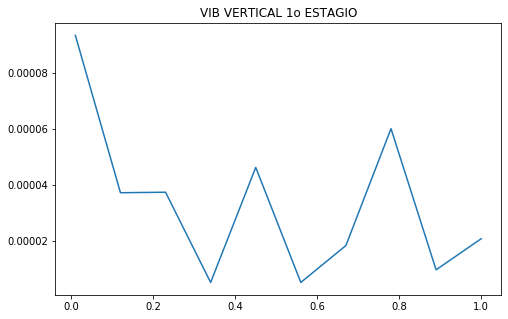

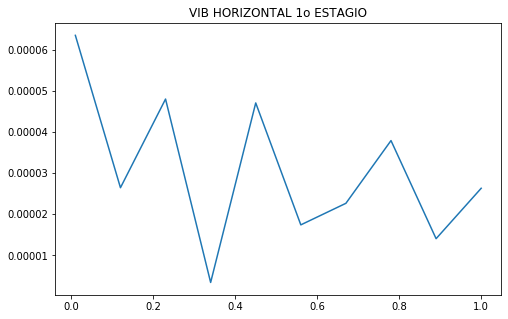

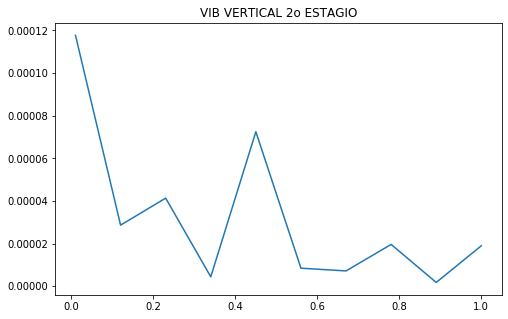

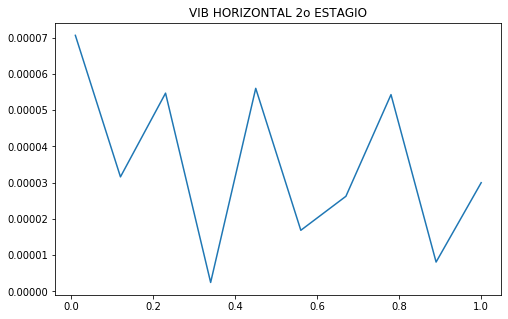

In [15]:
import scipy.signal as signal

for i in train.columns:
    x = np.linspace(1, 10000, 10000)
    y = train[i].values
    f = np.linspace(0.01, 1, 10)
    pgram = signal.lombscargle(x, y, f, normalize=True)
    plt.figure(figsize = [8, 5])
    plt.title(i)
    plt.plot(f, pgram)
    plt.show()
    del pgram

Considerações finais:
* Todas as vibrações apresentam valores mínimos negativos iguais
* A frequência da vibração mais comum ocorre entre 20.000 e 40.000